In [38]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data= pd.read_csv('/content/GOOG.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
new = data['date'].str.split(' ', expand=True)
data.drop(columns =['date'] , inplace=True)
data.insert(0,'date',new[0], True)
data

,date,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,GOOG,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1258 non-null   datetime64[ns]
 1   symbol       1258 non-null   object        
 2   close        1258 non-null   float64       
 3   high         1258 non-null   float64       
 4   low          1258 non-null   float64       
 5   open         1258 non-null   float64       
 6   volume       1258 non-null   int64         
 7   adjClose     1258 non-null   float64       
 8   adjHigh      1258 non-null   float64       
 9   adjLow       1258 non-null   float64       
 10  adjOpen      1258 non-null   float64       
 11  adjVolume    1258 non-null   int64         
 12  divCash      1258 non-null   float64       
 13  splitFactor  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 137.7+ KB


In [ ]:
data['date']= pd.to_datetime(data['date'])

In [ ]:
data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [ ]:
# checking dublicated date
# we just need check date
data['date'].duplicated().sum()

0

In [ ]:
data.drop(columns =['symbol','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor','adjClose'] , inplace=True)
data.set_index('date',inplace=True)
data

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


Text(0, 0.5, 'Prices ($)')

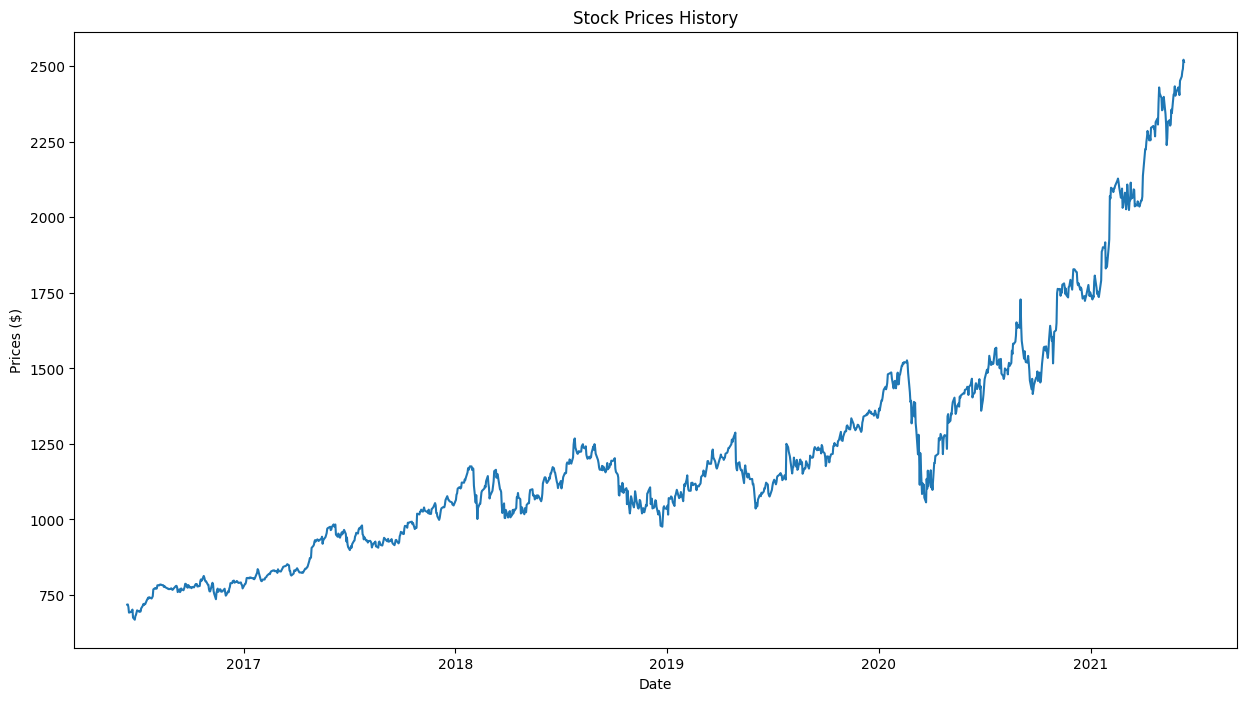

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(data['close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
data.shape

(1258, 5)

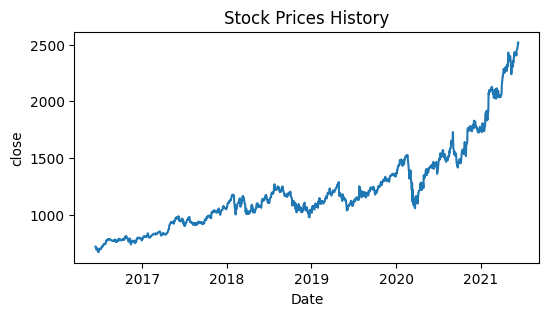

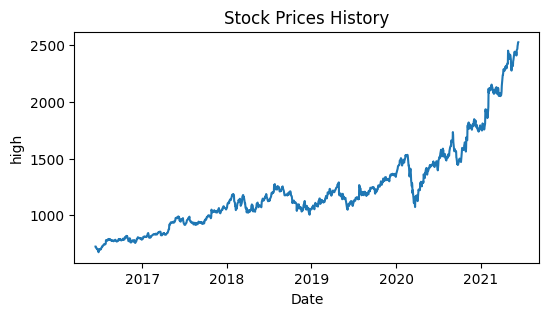

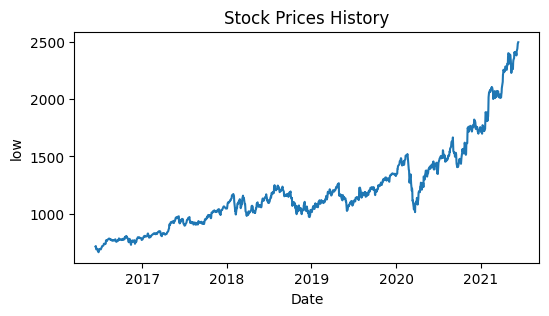

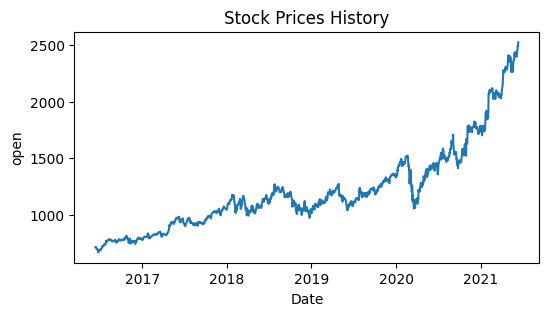

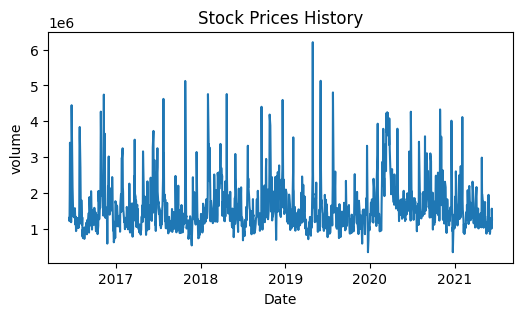

In [ ]:
feauters = ['close','high','low','open','volume']
         
i = 0
while i<5:
    plt.figure(figsize=(6, 3))
    plt.title('Stock Prices History')
    plt.plot(data[feauters[i]])
    plt.xlabel('Date')
    plt.ylabel(feauters[i])
    i += 1


In [ ]:
#We will use close price for prediction
close_prices = data['close']

# keras only takes numpy array
values = close_prices.values

# Calculate the data size for 80% of the dataset. The math.ceil method is to ensure the data size is rounded up to an integer.
training_data_len = math.ceil(len(values)* 0.8)

# Use the Scikit-Learn MinMaxScaler to normalize all our stock data ranging from 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# reshape our normalized data into a two-dimensional array.
scaled_data = scaler.fit_transform(values.reshape(-1,1))


# Set apart the first 80% of the stock data as the training set
train_data = scaled_data[0: training_data_len, :]

In [ ]:
#Create an empty list for a sequence of feature data (x_train) and a sequence of label data (y_train)
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
type(x_train)

list

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(947, 60)

In [ ]:
x_train.shape[0]

947

In [ ]:
x_train.shape[1]

60

In [ ]:
# newshape is in (batch size, number of timestamps, number of indicators). 
# (batch size, number of timestamps) is the shape of X_train. Here we only have 1 indicator.
x_train = np.reshape(x_train , newshape = (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(947, 60)

In [ ]:
# Extract the closing prices from our normalized dataset (the last 20% of the dataset)
test_data = scaled_data[training_data_len-60: , : ]

# Similar to the training set
# we will have to create feature data (x_test) and label data (y_test)from our test set.
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the feature data (x_test) and label data (y_test) into Numpy array. 
# Reshape again the x_test and y_test into a three-dimensional array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:

model1= keras.Sequential()
model1.add(layers.LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model1.add(layers.Dropout(rate = 0.2))
##add 2nd lstm layer
model1.add(layers.LSTM(units = 100, return_sequences = True))
model1.add(layers.Dropout(rate = 0.2))
##add 3rd lstm layer
model1.add(layers.LSTM(units = 100, return_sequences = True))
model1.add(layers.Dropout(rate = 0.2))
##add 4th lstm layer
model1.add(layers.LSTM(units = 100, return_sequences = False))
model1.add(layers.Dropout(rate = 0.2))
model1.add(layers.Dense(units = 25))
model1.add(layers.Dense(units = 1))
model1.summary()
# compiling model
model1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics =['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 2, 
                                        restore_best_weights = True)
  
history = model1.fit(x_train, y_train, batch_size = 32,epochs = 50, callbacks =[earlystopping])

Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.0000e+00

30/30 [==============================] - 16s 236ms/step - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 218ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 248ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 4/50
30/30 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 208ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 5/50
30/30 [==============================] - ETA: 0s - loss: 8.9679e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 246ms/step - loss: 8.9679e-04 - accuracy: 0.0000e+00
Epoch 6/50
30/30 [==============================] - ETA: 0s - loss: 7.8893e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 209ms/step - loss: 7.8893e-04 - accuracy: 0.0000e+00
Epoch 7/50
30/30 [==============================] - ETA: 0s - loss: 7.4976e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 248ms/step - loss: 7.4976e-04 - accuracy: 0.0000e+00
Epoch 8/50
30/30 [==============================] - ETA: 0s - loss: 7.5016e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 210ms/step - loss: 7.5016e-04 - accuracy: 0.0000e+00
Epoch 9/50
30/30 [==============================] - ETA: 0s - loss: 7.0302e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 245ms/step - loss: 7.0302e-04 - accuracy: 0.0000e+00
Epoch 10/50
30/30 [==============================] - ETA: 0s - loss: 9.7619e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 213ms/step - loss: 9.7619e-04 - accuracy: 0.0000e+00
Epoch 11/50
30/30 [==============================] - ETA: 0s - loss: 7.1078e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 239ms/step - loss: 7.1078e-04 - accuracy: 0.0000e+00
Epoch 12/50
30/30 [==============================] - ETA: 0s - loss: 6.6670e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 10s 321ms/step - loss: 6.6670e-04 - accuracy: 0.0000e+00
Epoch 13/50
30/30 [==============================] - ETA: 0s - loss: 5.7857e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 209ms/step - loss: 5.7857e-04 - accuracy: 0.0000e+00
Epoch 14/50
30/30 [==============================] - ETA: 0s - loss: 7.7104e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 248ms/step - loss: 7.7104e-04 - accuracy: 0.0000e+00
Epoch 15/50
30/30 [==============================] - ETA: 0s - loss: 6.4555e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 9s 299ms/step - loss: 6.4555e-04 - accuracy: 0.0000e+00
Epoch 16/50
30/30 [==============================] - ETA: 0s - loss: 5.5250e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 219ms/step - loss: 5.5250e-04 - accuracy: 0.0000e+00
Epoch 17/50
30/30 [==============================] - ETA: 0s - loss: 5.5629e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 10s 345ms/step - loss: 5.5629e-04 - accuracy: 0.0000e+00
Epoch 18/50
30/30 [==============================] - ETA: 0s - loss: 5.2916e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 14s 466ms/step - loss: 5.2916e-04 - accuracy: 0.0000e+00
Epoch 19/50
30/30 [==============================] - ETA: 0s - loss: 5.7084e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 221ms/step - loss: 5.7084e-04 - accuracy: 0.0000e+00
Epoch 20/50
30/30 [==============================] - ETA: 0s - loss: 4.7344e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 233ms/step - loss: 4.7344e-04 - accuracy: 0.0000e+00
Epoch 21/50
30/30 [==============================] - ETA: 0s - loss: 5.3633e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 250ms/step - loss: 5.3633e-04 - accuracy: 0.0000e+00
Epoch 22/50
30/30 [==============================] - ETA: 0s - loss: 5.1929e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 243ms/step - loss: 5.1929e-04 - accuracy: 0.0000e+00
Epoch 23/50
30/30 [==============================] - ETA: 0s - loss: 4.8179e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 248ms/step - loss: 4.8179e-04 - accuracy: 0.0000e+00
Epoch 24/50
30/30 [==============================] - ETA: 0s - loss: 5.2345e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 210ms/step - loss: 5.2345e-04 - accuracy: 0.0000e+00
Epoch 25/50
30/30 [==============================] - ETA: 0s - loss: 5.0882e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 247ms/step - loss: 5.0882e-04 - accuracy: 0.0000e+00
Epoch 26/50
30/30 [==============================] - ETA: 0s - loss: 4.4587e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 211ms/step - loss: 4.4587e-04 - accuracy: 0.0000e+00
Epoch 27/50
30/30 [==============================] - ETA: 0s - loss: 4.4073e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 249ms/step - loss: 4.4073e-04 - accuracy: 0.0000e+00
Epoch 28/50
30/30 [==============================] - ETA: 0s - loss: 4.8596e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 232ms/step - loss: 4.8596e-04 - accuracy: 0.0000e+00
Epoch 29/50
30/30 [==============================] - ETA: 0s - loss: 3.8661e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 220ms/step - loss: 3.8661e-04 - accuracy: 0.0000e+00
Epoch 30/50
30/30 [==============================] - ETA: 0s - loss: 4.2121e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 246ms/step - loss: 4.2121e-04 - accuracy: 0.0000e+00
Epoch 31/50
30/30 [==============================] - ETA: 0s - loss: 3.9692e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 8s 257ms/step - loss: 3.9692e-04 - accuracy: 0.0000e+00
Epoch 32/50
30/30 [==============================] - ETA: 0s - loss: 3.9738e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 248ms/step - loss: 3.9738e-04 - accuracy: 0.0000e+00
Epoch 33/50
30/30 [==============================] - ETA: 0s - loss: 3.6047e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 211ms/step - loss: 3.6047e-04 - accuracy: 0.0000e+00
Epoch 34/50
30/30 [==============================] - ETA: 0s - loss: 3.8487e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 249ms/step - loss: 3.8487e-04 - accuracy: 0.0000e+00
Epoch 35/50
30/30 [==============================] - ETA: 0s - loss: 3.7420e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 227ms/step - loss: 3.7420e-04 - accuracy: 0.0000e+00
Epoch 36/50
30/30 [==============================] - ETA: 0s - loss: 3.6067e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 228ms/step - loss: 3.6067e-04 - accuracy: 0.0000e+00
Epoch 37/50
30/30 [==============================] - ETA: 0s - loss: 3.5211e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 249ms/step - loss: 3.5211e-04 - accuracy: 0.0000e+00
Epoch 38/50
30/30 [==============================] - ETA: 0s - loss: 3.4164e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 212ms/step - loss: 3.4164e-04 - accuracy: 0.0000e+00
Epoch 39/50
30/30 [==============================] - ETA: 0s - loss: 3.0067e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 249ms/step - loss: 3.0067e-04 - accuracy: 0.0000e+00
Epoch 40/50
30/30 [==============================] - ETA: 0s - loss: 3.9420e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 210ms/step - loss: 3.9420e-04 - accuracy: 0.0000e+00
Epoch 41/50
30/30 [==============================] - ETA: 0s - loss: 3.8671e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 248ms/step - loss: 3.8671e-04 - accuracy: 0.0000e+00
Epoch 42/50
30/30 [==============================] - ETA: 0s - loss: 3.3709e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 212ms/step - loss: 3.3709e-04 - accuracy: 0.0000e+00
Epoch 43/50
30/30 [==============================] - ETA: 0s - loss: 3.4713e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 249ms/step - loss: 3.4713e-04 - accuracy: 0.0000e+00
Epoch 44/50
30/30 [==============================] - ETA: 0s - loss: 3.3495e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 217ms/step - loss: 3.3495e-04 - accuracy: 0.0000e+00
Epoch 45/50
30/30 [==============================] - ETA: 0s - loss: 2.9756e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 236ms/step - loss: 2.9756e-04 - accuracy: 0.0000e+00
Epoch 46/50
30/30 [==============================] - ETA: 0s - loss: 3.2774e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 245ms/step - loss: 3.2774e-04 - accuracy: 0.0000e+00
Epoch 47/50
30/30 [==============================] - ETA: 0s - loss: 2.9487e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 211ms/step - loss: 2.9487e-04 - accuracy: 0.0000e+00
Epoch 48/50
30/30 [==============================] - ETA: 0s - loss: 3.2875e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 249ms/step - loss: 3.2875e-04 - accuracy: 0.0000e+00
Epoch 49/50
30/30 [==============================] - ETA: 0s - loss: 2.9005e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 6s 210ms/step - loss: 2.9005e-04 - accuracy: 0.0000e+00
Epoch 50/50
30/30 [==============================] - ETA: 0s - loss: 3.0857e-04 - accuracy: 0.0000e+00

30/30 [==============================] - 7s 250ms/step - loss: 3.0857e-04 - accuracy: 0.0000e+00


In [ ]:
def plot_loss(history):
    training_loss = history
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)
    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r--')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();

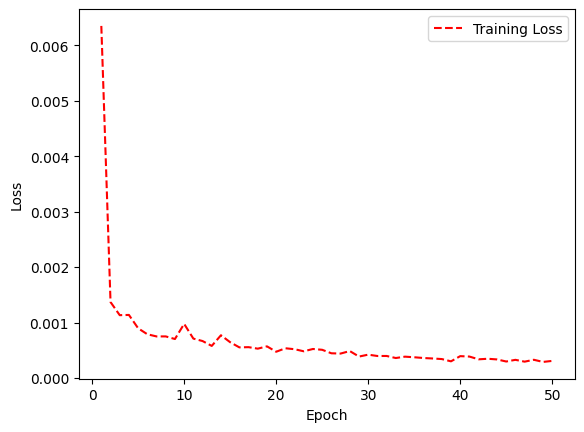

In [ ]:
plot_loss( history.history['loss'])

In [ ]:
   
def plot_predictions(model):
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    stock_data = data.filter(['close'])
    train = stock_data[:training_data_len]
    validation = stock_data[training_data_len:]
    validation['Predictions'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['close', 'Predictions']])
    plt.show()
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse=',rmse)
    print('\n\n')
    

8/8 [==============================] - 1s 64ms/step


<ipython-input-35-95484fbe3918>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


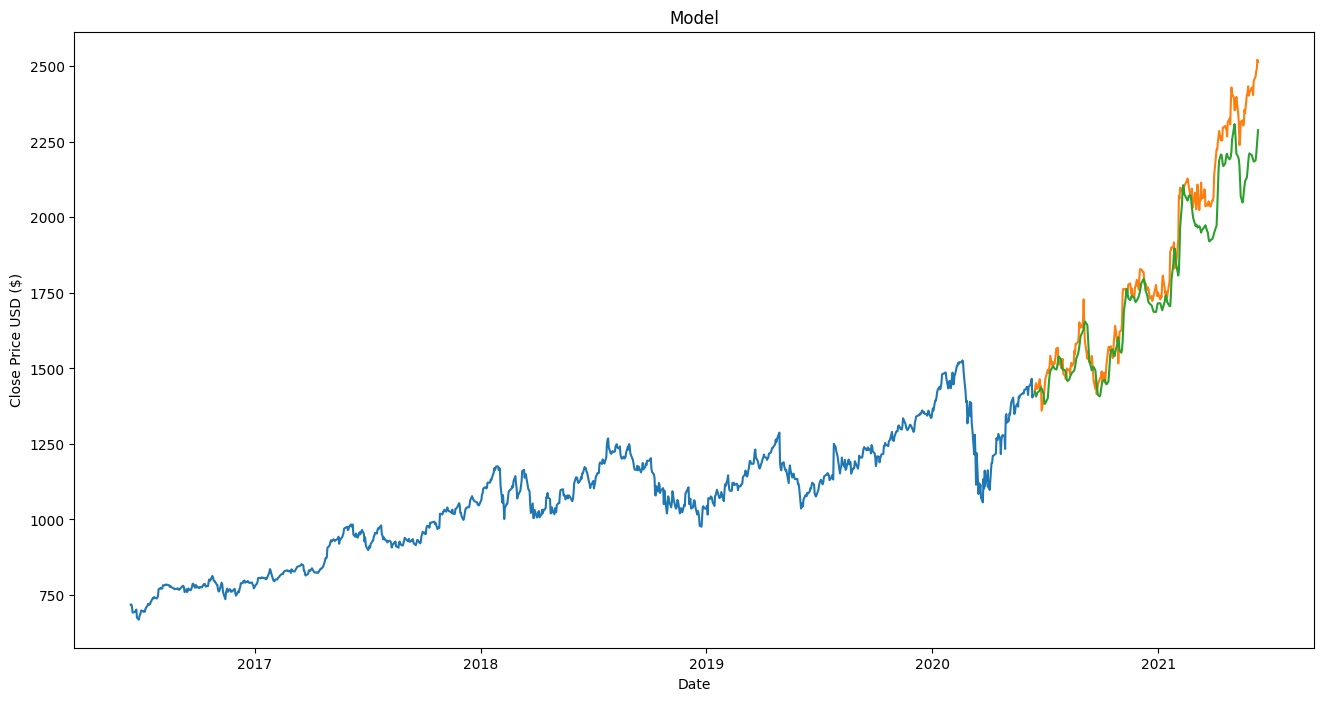

rmse= 66.80799656841388





In [ ]:
plot_predictions(model1)